<a href="https://colab.research.google.com/github/powersurge8891/Data-mining-with-Python/blob/main/DATA_MINING_WITH_CHAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/3. CHAID

/content/drive/MyDrive/Data Mining for Business in Python/3. CHAID


In [ ]:
!pip install CHAID
!pip install orca
!pip install graphviz

In [ ]:
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from CHAID import Tree
import statsmodels.api as sm

In [5]:
data=sm.datasets.get_rdataset('ResumeNames', package='AER').data

In [6]:
data.head()

,name,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,military,holes,school,email,computer,special,college,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,Allison,female,cauc,low,no,chicago,2,6,no,no,no,yes,no,no,yes,no,yes,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,Kristen,female,cauc,high,no,chicago,3,6,no,yes,yes,no,yes,yes,yes,no,no,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,Lakisha,female,afam,low,no,chicago,1,6,no,no,no,no,yes,no,yes,no,yes,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,Latonya,female,afam,high,no,chicago,4,6,no,yes,no,yes,no,yes,yes,yes,no,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,Carrie,female,cauc,high,no,chicago,3,22,no,no,no,no,yes,yes,yes,no,no,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


In [7]:
data.drop(columns='name', inplace=True) #because name is not a very good variable and it will create high level of noise.

In [8]:
data.head(3)

,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,military,holes,school,email,computer,special,college,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,female,cauc,low,no,chicago,2,6,no,no,no,yes,no,no,yes,no,yes,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,female,cauc,high,no,chicago,3,6,no,yes,yes,no,yes,yes,yes,no,no,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,female,afam,low,no,chicago,1,6,no,no,no,no,yes,no,yes,no,yes,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing


In [ ]:
# note that CHAID only accept categorical values.
data.apply(pd.Series.nunique)

In [ ]:
data.dtypes #checking for the one with numeric or continous variables.

##Transforming numeric variables

In [11]:
import seaborn as sns

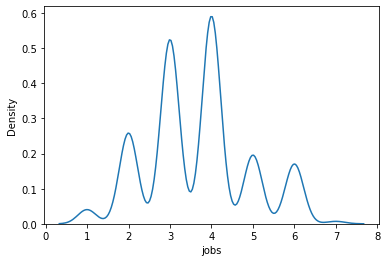

In [12]:
sns.kdeplot(data.jobs)

In [ ]:
data[['jobs']]

In [14]:
#trasnforming jobs. Grouping the numberic values into a range


In [15]:
data.jobs= pd.cut(x= data.jobs, 
                  bins=[-1,2.9,4.9,9],
                  labels=[0,1,2]       
                  
                  )


In [16]:
data.jobs 
# we need to factorize to remove the order.

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [19]:
data.jobs=pd.factorize(data.jobs)[0] #we only need the first index

In [20]:
data.jobs

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: int64

##Transforming experience

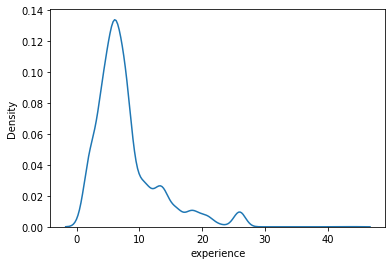

In [22]:
sns.kdeplot(data.experience)

In [24]:
data.experience= pd.qcut(x= data.experience, 
                  q=3,
                  labels=[0,1,2]       
                  
                  )
data.experience=pd.factorize(data.experience)[0]
data.experience

0       0
1       0
2       0
3       0
4       1
       ..
4865    2
4866    0
4867    0
4868    2
4869    0
Name: experience, Length: 4870, dtype: int64

##Transform minimum variable

In [25]:
#minimum variable is the minimum experience that was required in the job
data.minimum.value_counts() #the data looks messy with combination of float and int

none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: minimum, dtype: int64

In [27]:
replacement_dict= {'none':0,
                   '0.5':0,
                   '1':1,
                   '2':1,
                   '3':2,
                   '4':2,
                   'some':2,
                   '5':3,
                   '6':3,
                   '7':3,
                   '8':3,
                   '10':3
                   
                   }
replacement_dict

{'0.5': 0,
 '1': 1,
 '10': 3,
 '2': 1,
 '3': 2,
 '4': 2,
 '5': 3,
 '6': 3,
 '7': 3,
 '8': 3,
 'none': 0,
 'some': 2}

In [28]:
data.minimum=data.minimum.replace(replacement_dict)

In [29]:
data.minimum

0       3
1       3
2       3
3       3
4       2
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: minimum, Length: 4870, dtype: int64

#Transforming other variables

In [30]:
data=pd.get_dummies(data, drop_first=True, )
data.head(3)

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,military_yes,holes_yes,school_yes,email_yes,computer_yes,special_yes,college_yes,equal_yes,wanted_office support,wanted_other,wanted_retail sales,wanted_secretary,wanted_supervisor,requirements_yes,reqexp_yes,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
1,1,0,3,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
2,0,0,3,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0


#CHAID

In [55]:
y_val= data.call_yes.name
x_val= data.drop(columns='call_yes').columns
print(len(x_val))
print(x_val)


34
Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
       'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
       'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
       'wanted_other', 'wanted_retail sales', 'wanted_secretary',
       'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
       'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')


In [45]:
#CHAID TREE (we have imported tree earlier)
#you need to tell CHAID which of your data is ordinal and which is nominal
 #there were 34 columns. The first 3 were ordinal

In [64]:
model=Tree.from_pandas_df(data, 
                    
                    dict(zip(x_val, ['ordinal']*3+ ['nominal']*31))
                    
                    , y_val, max_depth=3, min_child_node_size=250

)

#Visualization

In [62]:
import orca
import plotly
import plotly.graph_objects as go

In [66]:
#model.render()